## Lead Scoring Project

### Step 1: Importing Libraries and Data

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#import statmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#Reading dataset
df_leads = pd.read_csv('Leads.csv')

### Step 2: Data Understanding and Inspection

In [3]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df_leads.shape

(9240, 37)

<font color="red"> Note: the original df has 9240 X 37</font>

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking datatype/ non null
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 


### Step 3: Data Cleaning

1. Handling "Select" in many categorical variables

In [7]:
# Converting 'Select' values to NaN
df_leads=df_leads.replace('Select',np.nan)

2. Check for duplicate rows

In [8]:
# Check for duplicate rows
print(df_leads.duplicated().sum())

0


3. Handling column with only one value

In [9]:
# Check columns with only one unique value
single_unique_cols = []
for column in df_leads.columns:
    unique_values = df_leads[column].dropna().unique()
    if len(unique_values) == 1:
        single_unique_cols.append(column)

num_single_unique_cols = len(single_unique_cols)

print(f"The number of columns with unique value (ignore null): {num_single_unique_cols}")
print(f"Name of columns with unique value (ignore null) : {single_unique_cols}")

The number of columns with unique value (ignore null): 5
Name of columns with unique value (ignore null) : ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [10]:
# Drop columns with only one unique value
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=single_unique_cols, inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 37)
After Drop:  (9240, 32)


4. Handling missing value (MV)

In [11]:
# Check null value rate (%)
nan_percentage=100*(df_leads.isna().mean()).sort_values(ascending=False)
print(nan_percentage)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

<font color="red"> Note: There are many columns with missing/null value. To ensure data quality, the columns with missing value: <br>
    - Dropping the columns with percentage of missing/null value are >= 40%; <br>
    - Inspecting data in the remain columns to consider how to treat with them in each case </font>

In [12]:
#Dropping columns with missing/null value >= 40%
col_to_drop = nan_percentage[nan_percentage >= 40].index.to_list() # Filter columns with null percentage greater than 40
print("Before Drop: ",df_leads.shape)
df_leads = df_leads.drop(columns=col_to_drop) # Drop the selected columns
print('Total of columns dropped:', len(col_to_drop),'\n')
print('List of columns dropped:', col_to_drop,'\n')
print("After Drop: ",df_leads.shape)


Before Drop:  (9240, 32)
Total of columns dropped: 7 

List of columns dropped: ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'] 

After Drop:  (9240, 25)


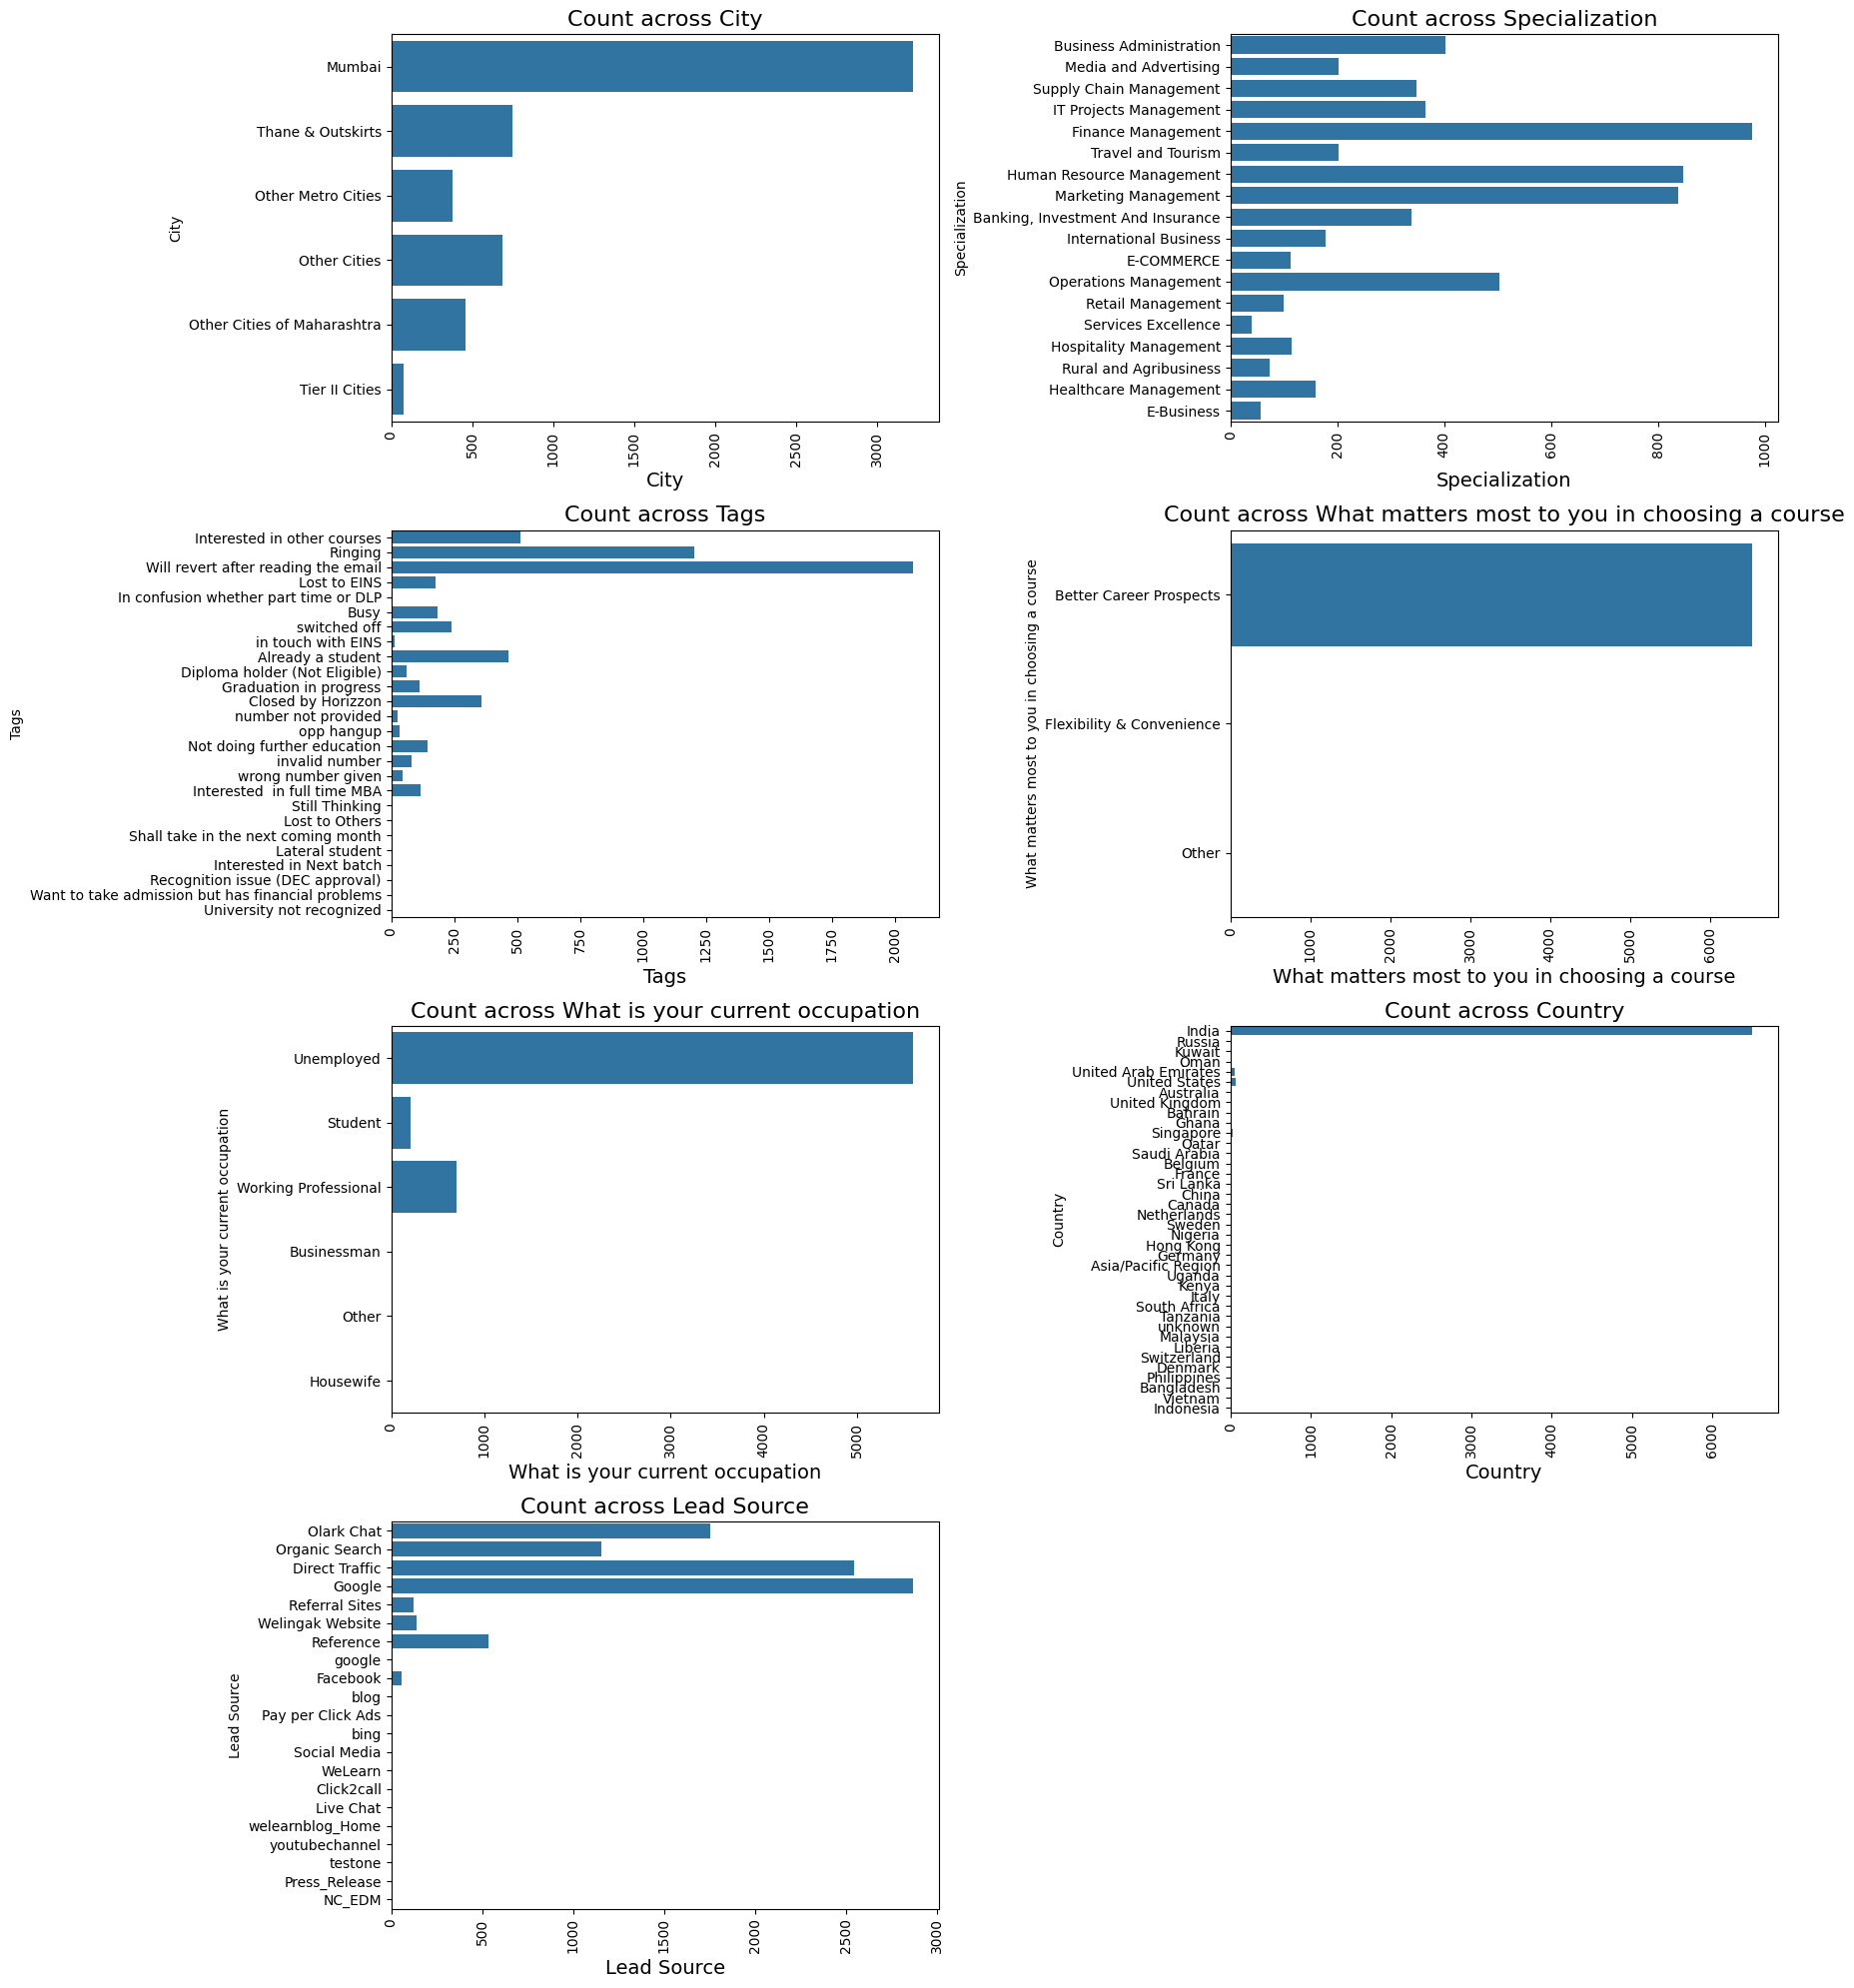

In [13]:
# observe the remain columns with category variable having missing values
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(df_leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,20))


countplot('City',1)
countplot('Specialization',2)
countplot('Tags',3)
countplot('What matters most to you in choosing a course',4)
countplot('What is your current occupation',5)
countplot('Country',6)
countplot('Lead Source',7)


plt.tight_layout()
plt.show()

<font color="red"> Making action for the columns contain missing value (MV):<br>
    + 'City', 'Tags','Country' , MV is pretty high and no use in modeling=> Drop them <br>
    + 'What is your current occupation?',"Last Activity','Lead Source' => Imputing by Mode value <br>
    + 'Specialization', null maybe their specialization is not exist in this list => Null value was instead of 'Others'<br>
    + 'What matters most to you in choosing a course' is the most variable "Better Career Prospect" like only one value ==> drop this column <br>
    +  the columns with percentage of missing value is insignificant (<2%, 4 columns) ==> drop these missing rows <font>

In [14]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [15]:

#drop column with only one value
df_leads.drop(columns=['What matters most to you in choosing a course','City', 'Tags','Country'], inplace=True)

#drop these missing rows is insignificant (<2%, 4 columns)
df_leads.dropna(inplace = True)


In [16]:
# Recheck df after cleaning data
100*(df_leads.isna().mean())


Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [17]:
df_leads.shape

(9103, 21)

In [18]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Do Not Call                             9103 non-null   object 
 6   Converted                               9103 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9103 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9103 non-null   object 
 

<font color="red"> Note: Now dataframe has 9074 x 24 (original: 9240 X 37) </font>

5. Handling columns with wrong datatype

In [19]:
# Update data type
df_leads['TotalVisits'] = df_leads['TotalVisits'].astype('int64')
df_leads['Page Views Per Visit'] = df_leads['Page Views Per Visit'].astype('int64')
#Recheck
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Prospect ID                             9103 non-null   object
 1   Lead Number                             9103 non-null   int64 
 2   Lead Origin                             9103 non-null   object
 3   Lead Source                             9103 non-null   object
 4   Do Not Email                            9103 non-null   object
 5   Do Not Call                             9103 non-null   object
 6   Converted                               9103 non-null   int64 
 7   TotalVisits                             9103 non-null   int64 
 8   Total Time Spent on Website             9103 non-null   int64 
 9   Page Views Per Visit                    9103 non-null   int64 
 10  Last Activity                           9103 non-null   object
 11  Specializ

6. Handling unnesscary columns

In [20]:
print("Before Drop: ",df_leads.shape)
df_leads=df_leads.drop(['Prospect ID', 'Lead Number','Last Notable Activity'],axis=1)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 21)
After Drop:  (9103, 18)


7. Checking Data Imbalance

Checking skewness in categorical columns

In [21]:
# plotting countplot for object dtype
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
num_object_col = len(df_leads.select_dtypes(include=['object']).columns)
print(num_object_col)
print(categorical_col)



14
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


Check: Lead Origin

In [22]:
df_leads['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

Check: Lead Source

In [23]:
df_leads['Lead Source'].value_counts()

Lead Source
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [24]:
# Renaming "google" to "Google"
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google', 'Google')


In [25]:
df_leads['Lead Source'].value_counts()

Lead Source
Google               2902
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Check: Do Not Email

In [26]:
df_leads['Do Not Email'].value_counts()

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

Check: Do Not Call

In [27]:
df_leads['Do Not Call'].value_counts()

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

In [28]:
#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['Do Not Call'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 18)
After Drop:  (9103, 17)


Check: Last Activity

In [29]:
df_leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

Check: Specialization

In [30]:
df_leads['Specialization'].value_counts()

Specialization
Others                               3304
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Check: What is your current occupation

In [31]:
df_leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8185
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

Check: Search

In [32]:
df_leads['Search'].value_counts()

Search
No     9089
Yes      14
Name: count, dtype: int64

In [33]:
#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['Search'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 17)
After Drop:  (9103, 16)


Check: Newspaper Article

In [34]:
df_leads['Newspaper Article'].value_counts()

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [35]:
#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['Newspaper Article'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 16)
After Drop:  (9103, 15)


Check: X Education Forums

In [36]:
df_leads['X Education Forums'].value_counts()

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64

In [37]:

#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['X Education Forums'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 15)
After Drop:  (9103, 14)


Check: Newspaper

In [38]:
df_leads['Newspaper'].value_counts()

Newspaper
No     9102
Yes       1
Name: count, dtype: int64

In [39]:

#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['Newspaper'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 14)
After Drop:  (9103, 13)


Check: Digital Advertisement

In [40]:
df_leads['Digital Advertisement'].value_counts()

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64

In [41]:
#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['Digital Advertisement'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 13)
After Drop:  (9103, 12)


Check: Through Recommendations

In [42]:
df_leads['Through Recommendations'].value_counts()

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64

In [43]:
#Drop due to highly skewed
print("Before Drop: ",df_leads.shape)
df_leads.drop(columns=['Through Recommendations'], inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9103, 12)
After Drop:  (9103, 11)


Check: A free copy of Mastering The Interview

In [44]:
df_leads['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

In [45]:

df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5,674,2,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Others,Unemployed,No


In [46]:
df_leads.shape

(9103, 11)

In [47]:
nan_percentage=100*(df_leads.isna().mean()).sort_values(ascending=False)
print(nan_percentage)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


8. Outlier Analysis

In [48]:
#Filter column with datatype integer or fload
numeric_columns = df_leads.select_dtypes(include=['int', 'float']).columns.tolist()
print(numeric_columns)


['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


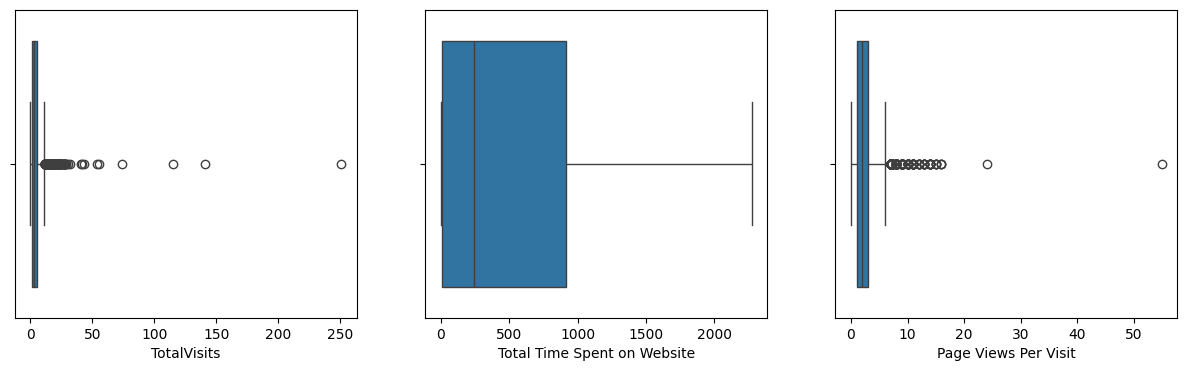

In [49]:
# Checking outliers
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=df_leads)



<font color="red"> Note: There are few outliers in "TotalVisits" and "Page Views Per Visit" columns. There are no outliers in "Total Time Spent on Website". <br>
Let's remove the outliers of those columns (removing the outliers between 10th and 90th percentile) 


In [50]:
# Finding outliers in 'TotalVisits' and 'Page Views Per Visit' columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_list_outlier: 
    q1 = df_leads[col].quantile(0.10)
    q3 = df_leads[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_leads = df_leads.loc[(df_leads[col] > range_low) & (df_leads[col] < range_high)]

df_leads.shape


(8999, 11)

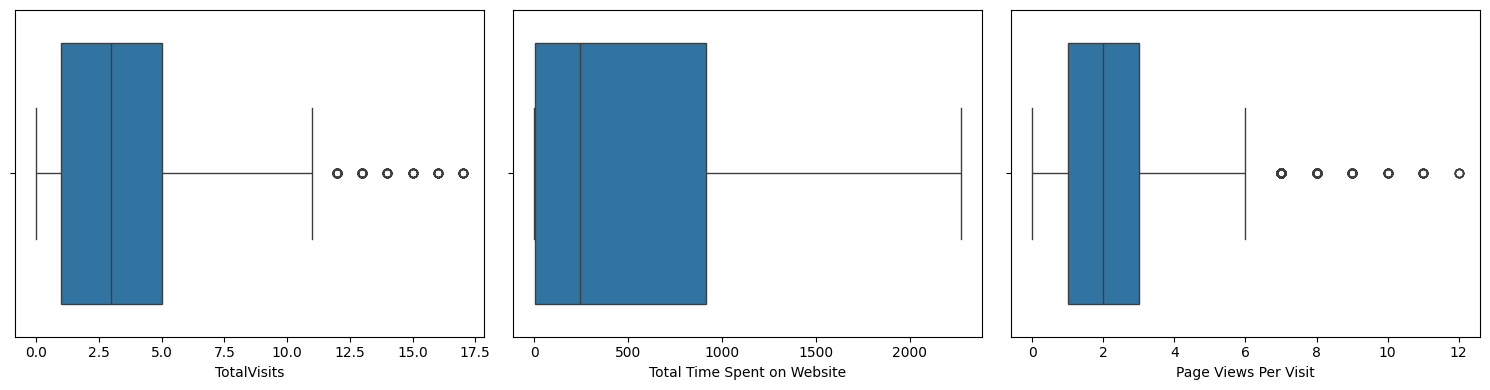

In [51]:
## After Treatment of outliers
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=df_leads)

plt.tight_layout()

9. Converting some binary variables (Yes/No) to 1/0

In [52]:
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

df_leads[varlist] = df_leads[varlist].apply(binary_map)

In [53]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5,674,2,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,Others,Unemployed,0


### Step 4: EDA

Univariate Analysis and Bivariate Analysis

Converation rate

In [54]:
Converted = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
Converted

37.97088565396155

Bivariate Analysis for Numerical Variables

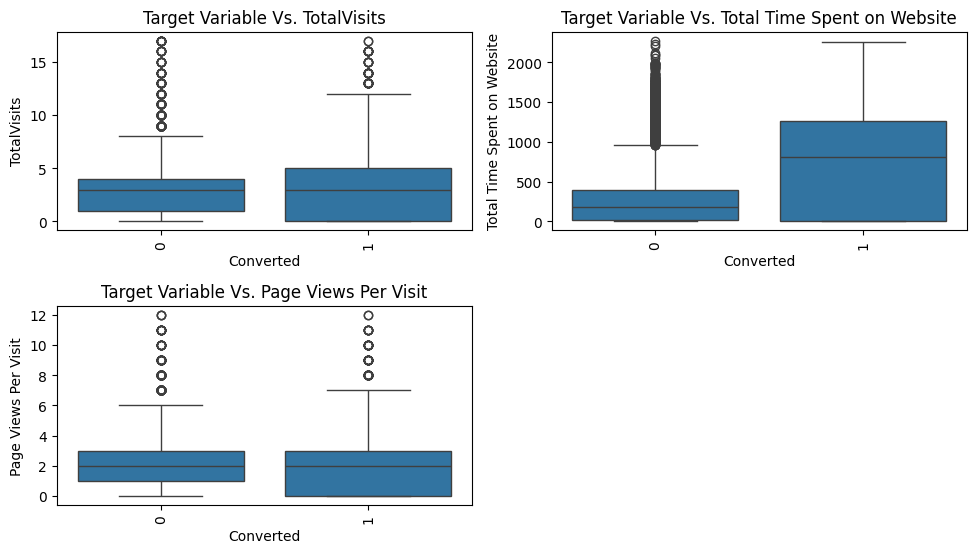

In [55]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df_leads)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         

boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()


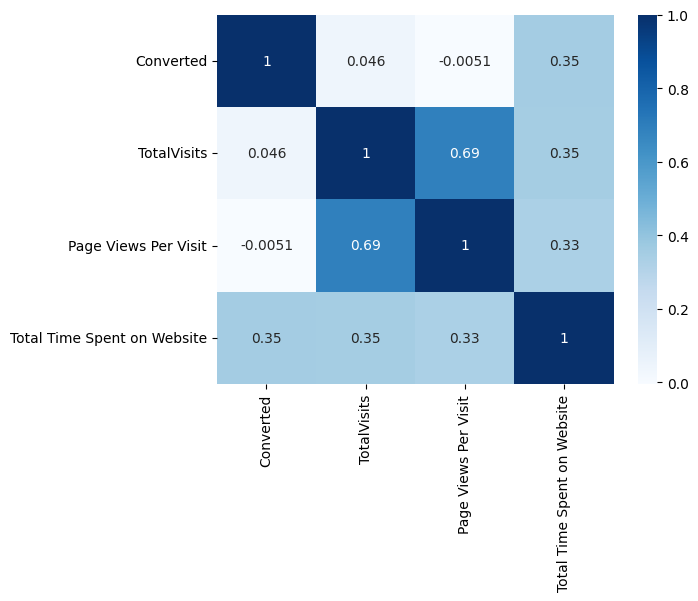

In [56]:
# Heatmap to show correlation between numerical variables
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

<font color="red">Inference: <br>
Total Visits & Page Views Per Visit - Median for both types of Leads: converted and non-converted are similar.<br>
Total Time Spent on website - Leads who spend more time on the X education website, have more chances of converting.



Bivariate Analysis for Categorical Variables

IndexError: list index out of range

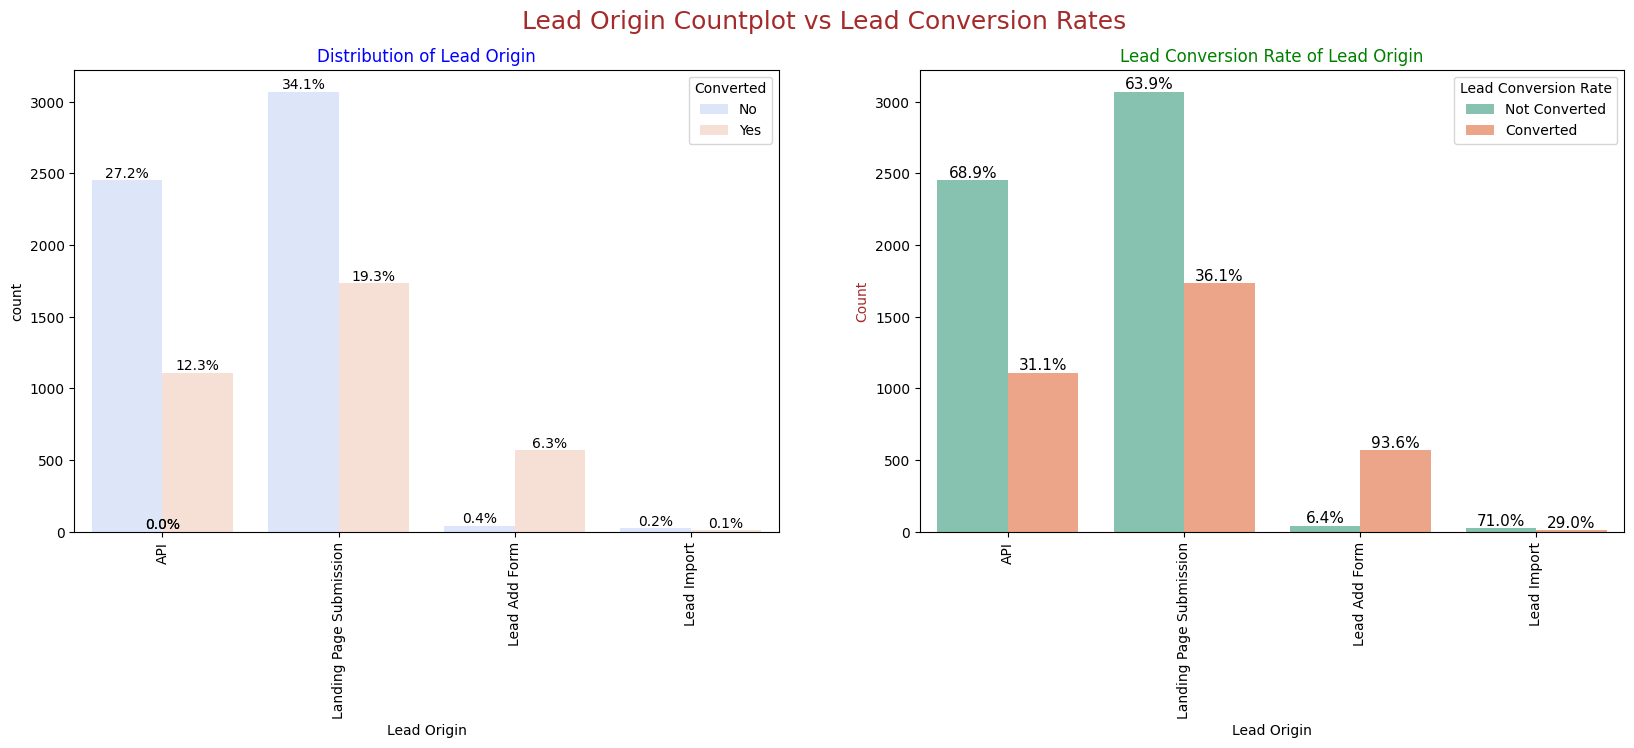

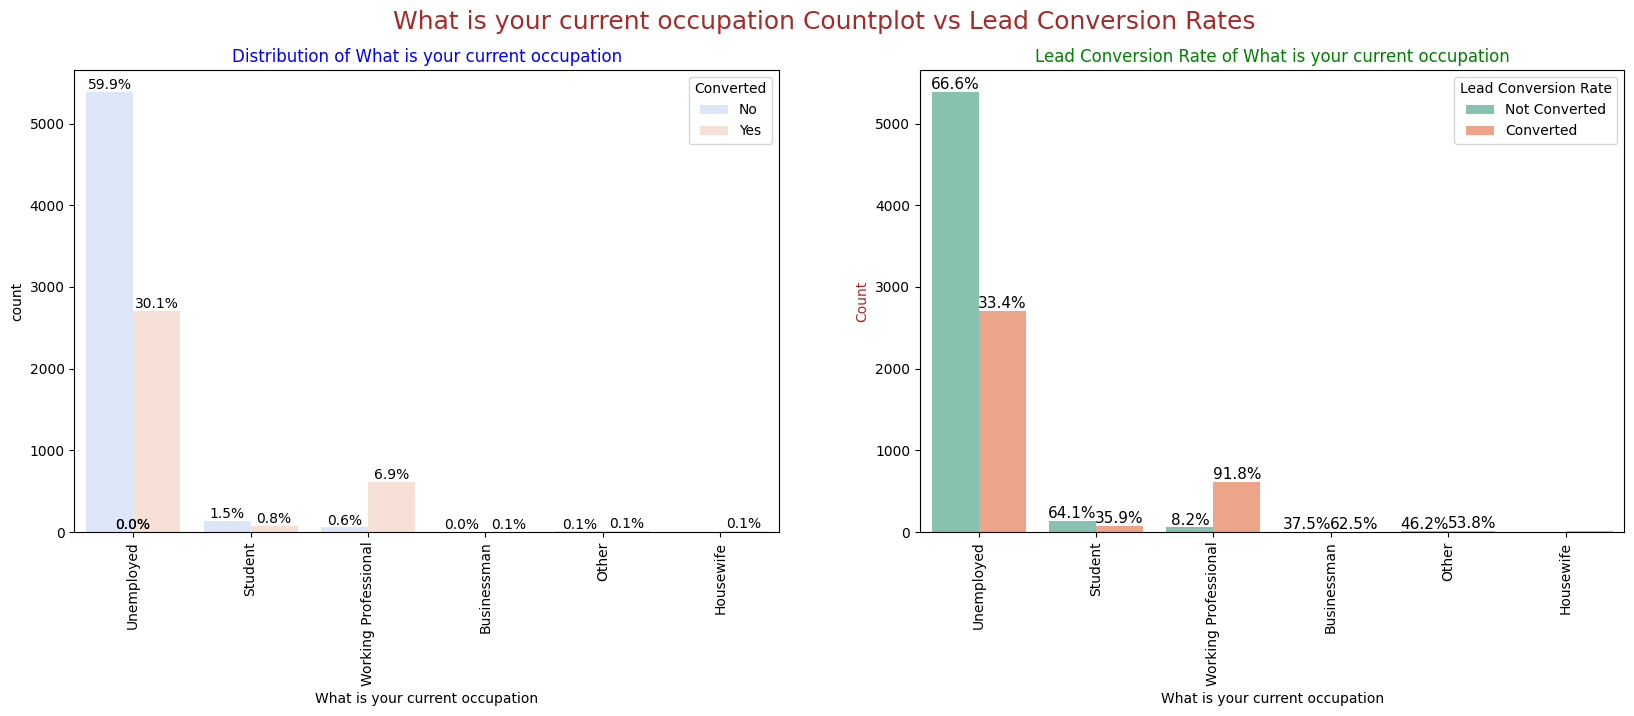

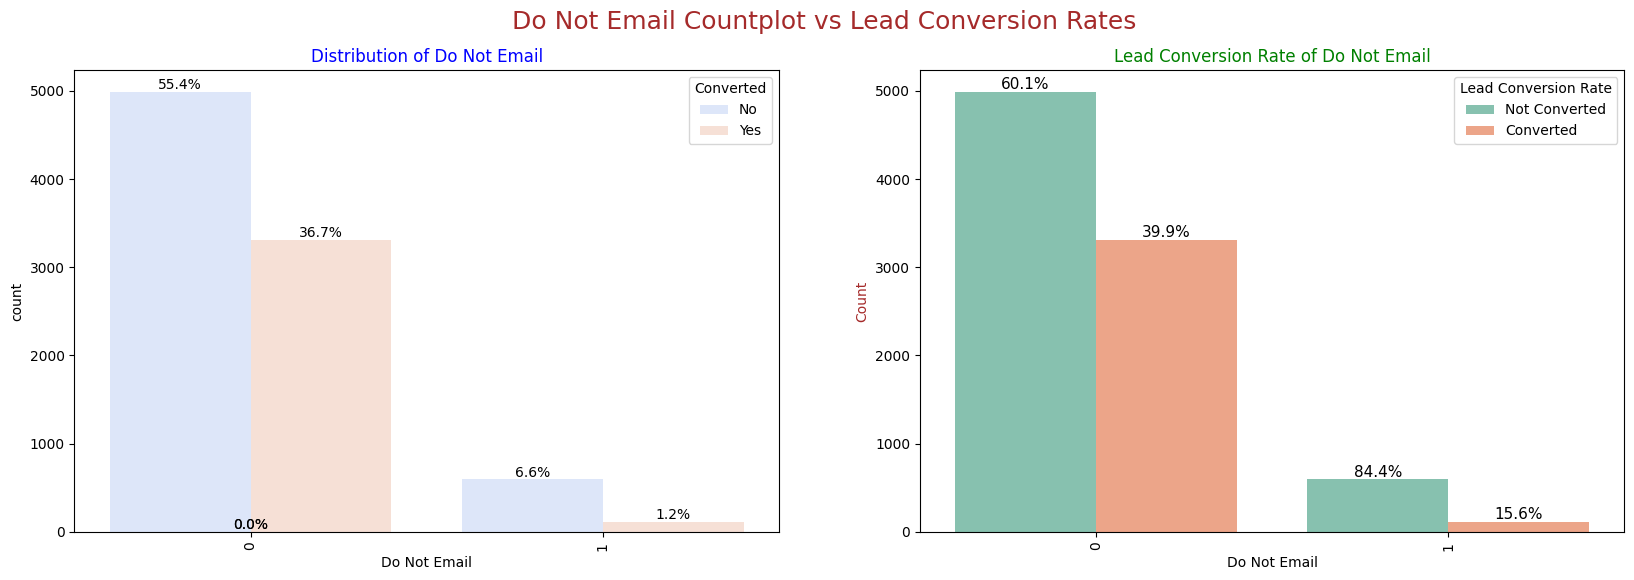

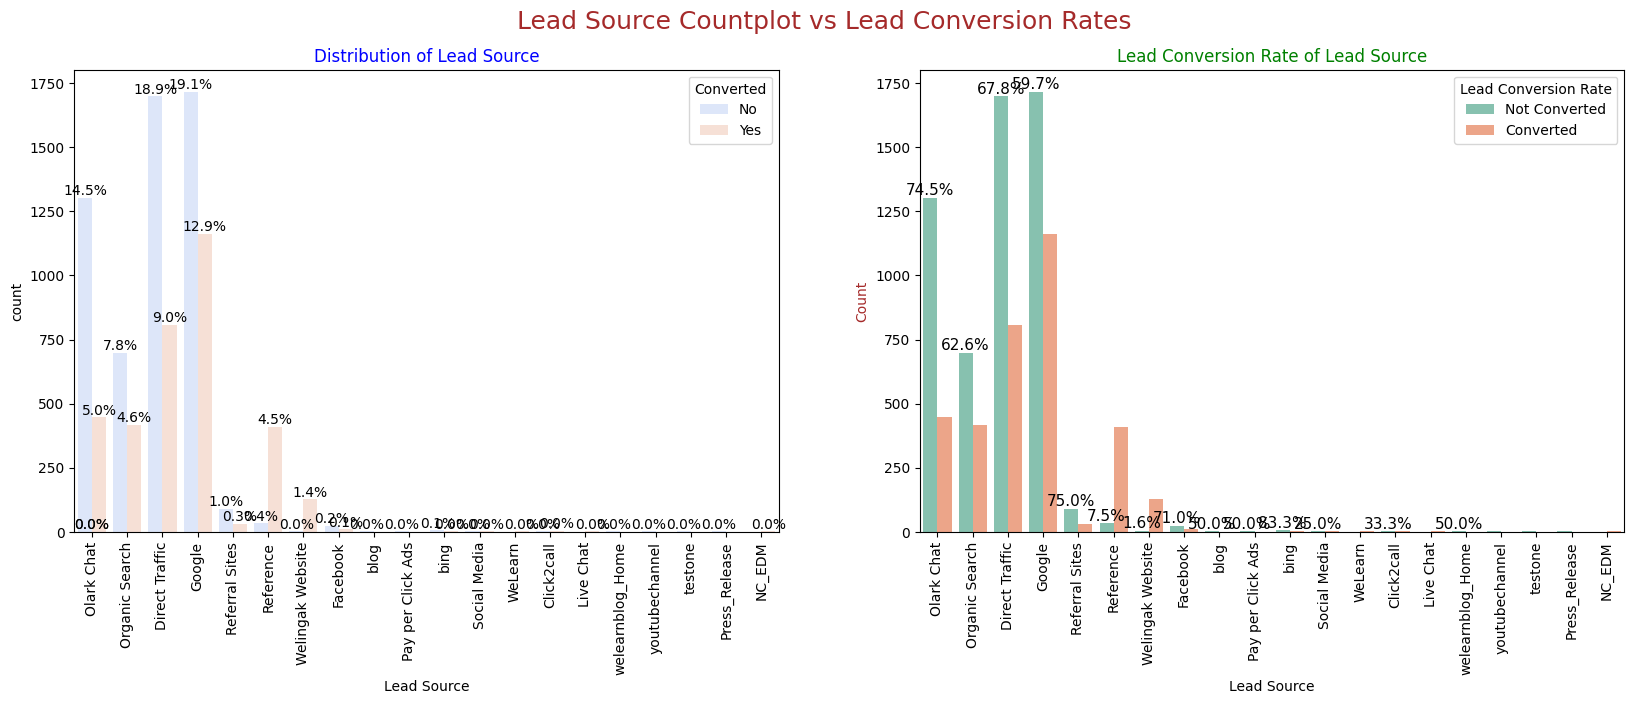

In [58]:
def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(20, 6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color="Brown", fontsize=18)
    
    # First plot in the subplot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="coolwarm", alpha=0.46)
    
    total = len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")
    
    # Annotation for the first plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Second plot
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="Set2", alpha=0.85)
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count", color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")
    
    # Annotation for the second plot
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if i < len(all_heights[0]):  # Ensure the index is within bounds
                total = sum(xgroup[i] for xgroup in all_heights)
                percentage = f'{(100 * p.get_height() / total):.1f}%'
                ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

cat_cols = ["Lead Origin", "What is your current occupation", "Do Not Email",
            "Lead Source", "Last Activity", "Specialization", 'A free copy of Mastering The Interview']

for i in cat_cols:
    Bivariate_cat(df_leads, variable_name=i)

Inference: <br>
<span style="color:blue">Lead Origin:</span> Approximately 53.5% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%. The "API" identified approximately 39.6% of customers with a lead conversion rate (LCR) of 31% <br>

<span style="color:blue">Current Occupation:</span> About 90% of customers are unemployed, with a lead conversion rate (LCR) of 33%. Conversely, Working Professionals constitute only 7.5% of total customers but have an almost 92% lead conversion rate (LCR).<br>

<span style="color:blue">Do Not Email:</span> 92.3% of people have opted not to receive emails about the course, yet the lead conversion rate (LCR) is around 40%.<br>

<span style="color:blue">Lead Source:</span> The highest lead conversion rate (LCR) is from Google data.<br>

### Step 5: Data Preparation

Converted some binary variables (Yes/No) to 1/0 at step 3 for EDA.

For categorical variables with multiple levels, create dummy features

In [59]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5,674,2,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,Others,Unemployed,0


In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [61]:
#df_leads = df_leads.replace({True: 1, False: 0})

In [62]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Others,Unemployed,...,False,False,False,False,False,False,False,False,True,False
1,API,Organic Search,0,0,5,674,2,Email Opened,Others,Unemployed,...,False,False,False,False,False,False,False,False,True,False
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,...,False,False,False,False,False,False,False,True,False,False
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Unreachable,Media and Advertising,Unemployed,...,False,False,False,False,False,False,False,False,True,False
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,Others,Unemployed,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation"], axis=1)

In [ ]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Do Not Email                                          8970 non-null   int64
 1   Converted                                             8970 non-null   int64
 2   TotalVisits                                           8970 non-null   int64
 3   Total Time Spent on Website                           8970 non-null   int64
 4   Page Views Per Visit                                  8970 non-null   int64
 5   A free copy of Mastering The Interview                8970 non-null   int64
 6   Lead Origin_Landing Page Submission                   8970 non-null   int64
 7   Lead Origin_Lead Add Form                             8970 non-null   int64
 8   Lead Origin_Lead Import                               8970 non-null   int64
 9   Le

### Step 6: Test-Train Split

In [ ]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6279, 50) 
y_train: (6279,)


In [ ]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2691, 50) 
y_test: (2691,)


### Step 7: Feature Scaling

In [ ]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3825,-0.294143,-1.086657,-0.885830,-1.117894,-0.674903,-1.059923,3.773631,-0.063225,-0.064483,-0.677153,...,-0.100673,-0.096557,-0.065716,-0.197619,-0.143101,-0.033408,-0.041892,-0.161704,0.340105,-0.28379
3307,-0.294143,0.285997,1.481982,0.879618,-0.674903,0.943465,-0.264997,-0.063225,-0.064483,1.476770,...,-0.100673,-0.096557,-0.065716,-0.197619,-0.143101,-0.033408,-0.041892,-0.161704,0.340105,-0.28379
5527,-0.294143,-1.086657,-0.885830,-1.117894,-0.674903,-1.059923,-0.264997,-0.063225,-0.064483,-0.677153,...,-0.100673,-0.096557,-0.065716,-0.197619,-0.143101,-0.033408,-0.041892,-0.161704,0.340105,-0.28379
5180,-0.294143,-1.086657,-0.885830,-1.117894,-0.674903,-1.059923,-0.264997,-0.063225,-0.064483,-0.677153,...,-0.100673,-0.096557,-0.065716,-0.197619,-0.143101,-0.033408,-0.041892,-0.161704,0.340105,-0.28379
7064,-0.294143,1.315488,1.410174,2.377751,1.481695,-1.059923,-0.264997,-0.063225,-0.064483,-0.677153,...,-0.100673,-0.096557,-0.065716,-0.197619,-0.143101,-0.033408,-0.041892,-0.161704,0.340105,-0.28379


In [ ]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# Denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

37.803790412486066

<span style="color:red">Note: We have 37.8% Conversion Rate

### Step 7: Looking at Correlation

Feature elimination based on correlations

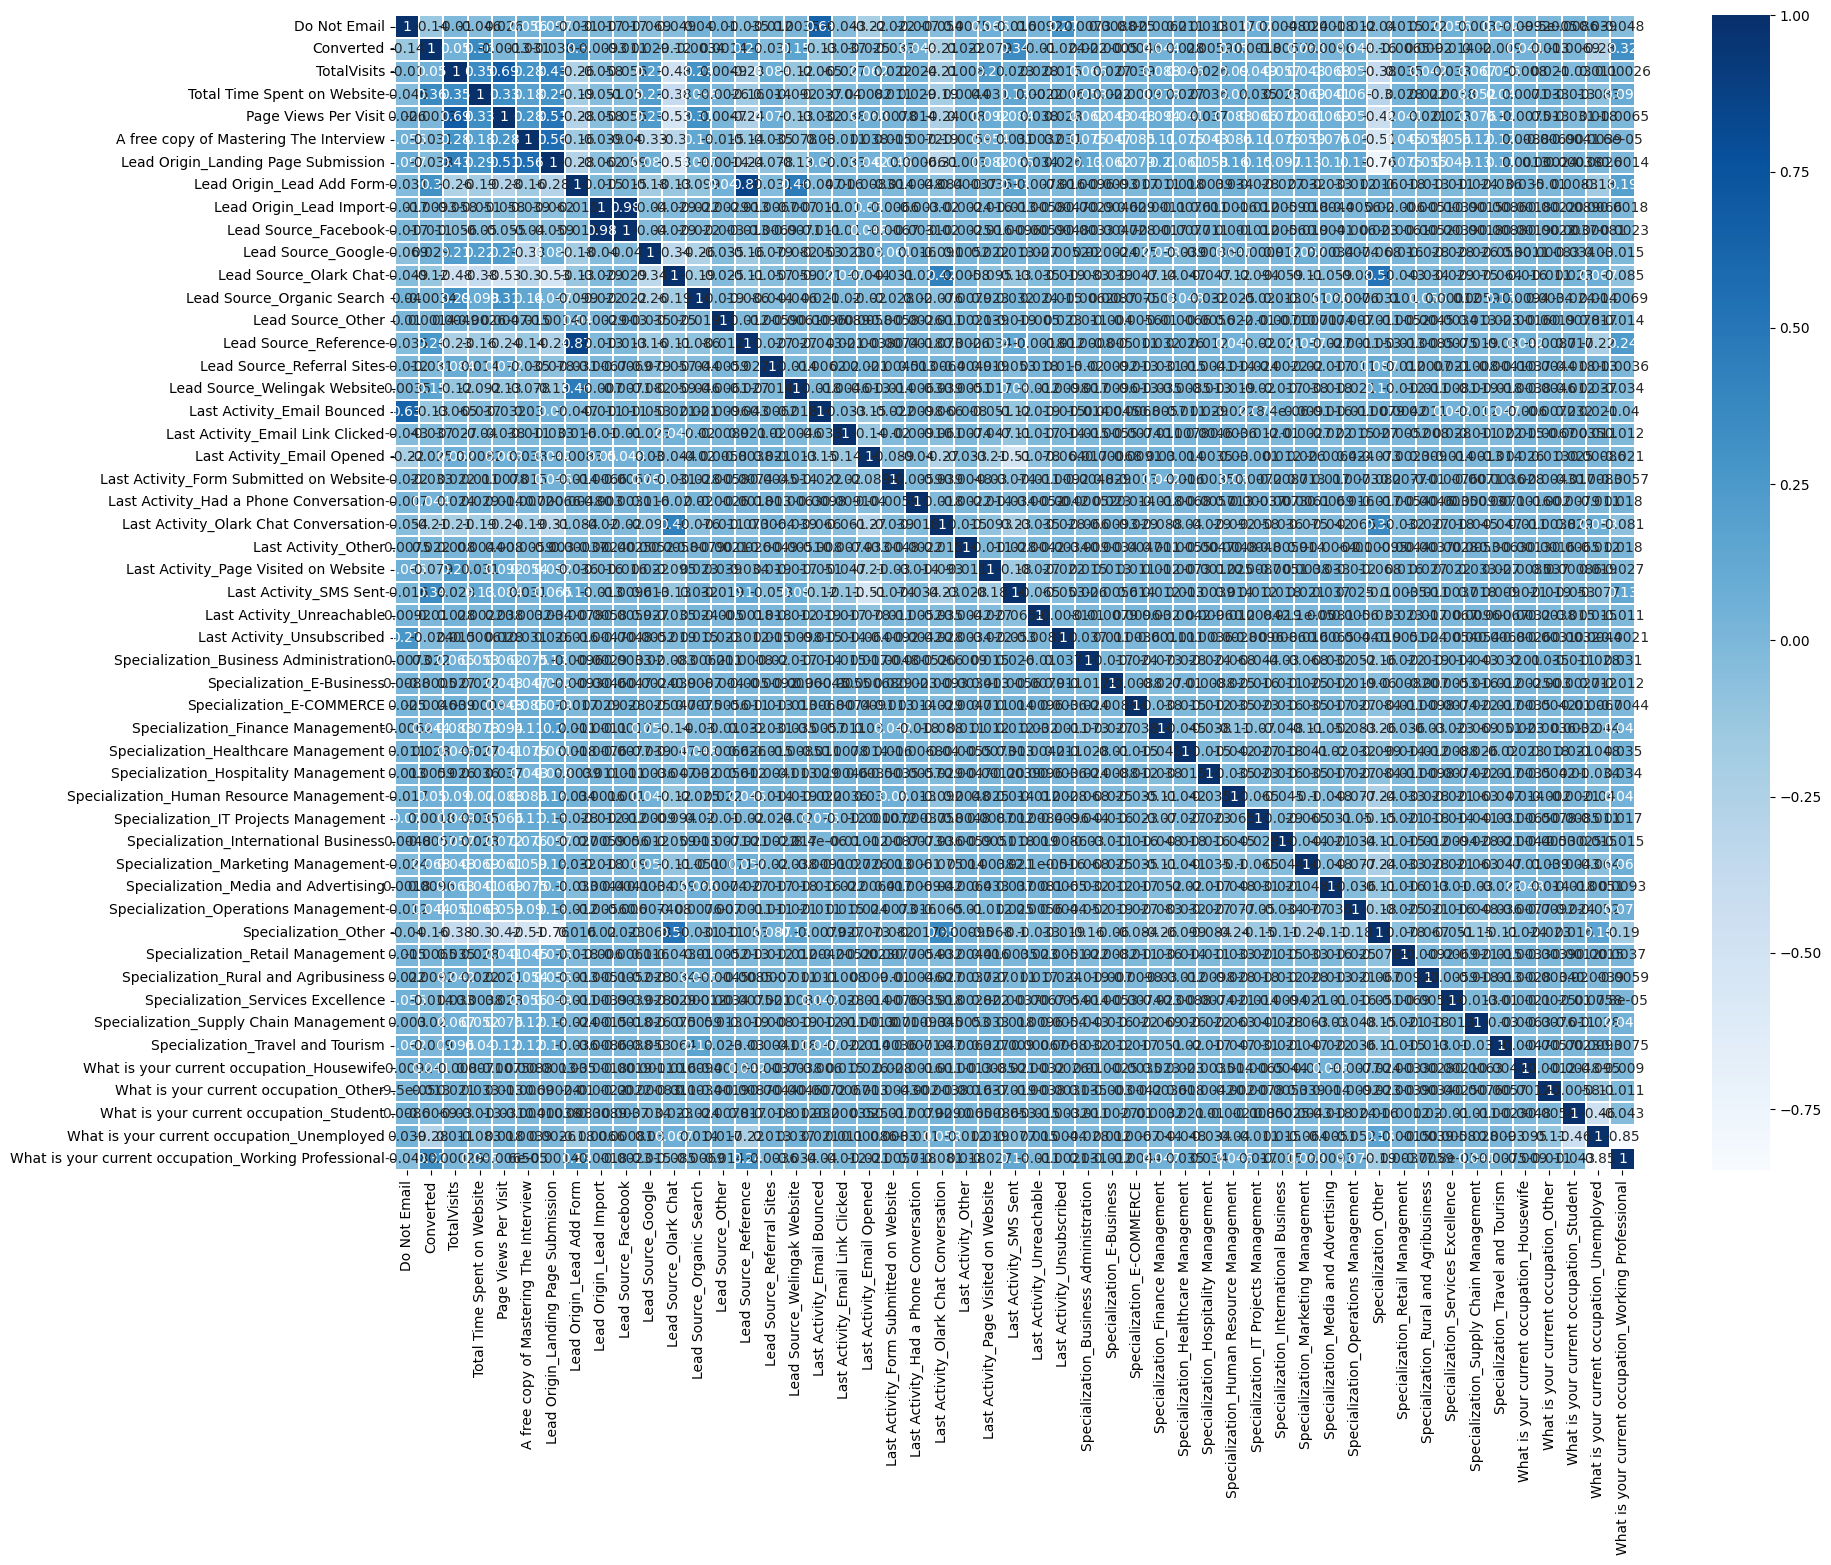

In [ ]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

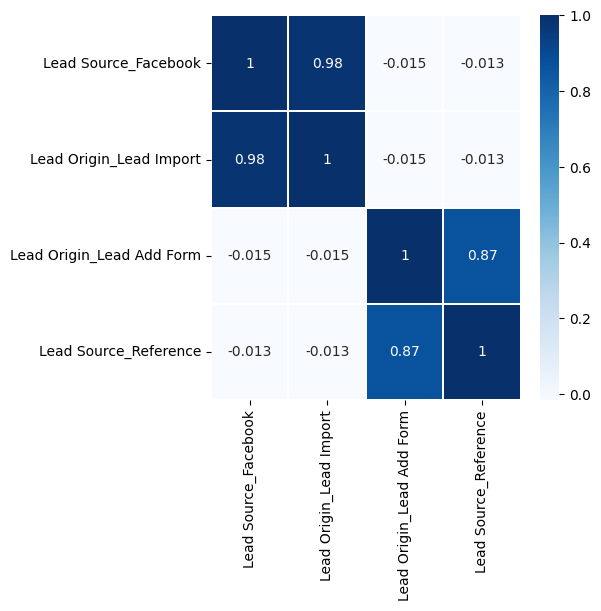

In [ ]:
# columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<span style="color:red">Note: These predictor variables are very highly correlated with each other (0.98 and 0.85) => drop one of these variables from each pair to not add more value to the model. <br>
=> drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

### Step 8: Model Building

Feature Selection Using RFE (Recursive Feature Elimination)

In [ ]:
# Use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Recheck the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Had a Phone Conversation', False, 5),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 12),
 ('Last Activity_Page Vis

In [ ]:
# Replacing using as zip using this for more readablility
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
45,What is your current occupation_Housewife,True,1
39,Specialization_Other,True,1
21,Last Activity_Olark Chat Conversation,True,1
18,Last Activity_Email Opened,True,1
15,Lead Source_Welingak Website,True,1
13,Lead Source_Reference,True,1
10,Lead Source_Olark Chat,True,1
24,Last Activity_SMS Sent,True,1
49,What is your current occupation_Working Profes...,True,1


In [ ]:
# columns are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [ ]:
# Define function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

Model 1

In [ ]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                  -0.555340
Do Not Email                                           -0.290691
TotalVisits                                             0.260853
Total Time Spent on Website                             1.073731
Page Views Per Visit                                   -0.178861
Lead Origin_Landing Page Submission                    -0.533016
Lead Origin_Lead Add Form                               0.601256
Lead Source_Olark Chat                                  0.448092
Lead Source_Reference                                   0.222484
Lead Source_Welingak Website                            0.403312
Last Activity_Email Opened                              0.294924
Last Activity_Olark Chat Conversation                  -0.340571
Last Activity_SMS Sent                                  0.813269
Specialization_Other                                   -0.499292
What is your current occupation_Housewife               0.758609
What is your current occu

In [ ]:
#Summarylogistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.3
Date:                Tue, 25 Jun 2024   Deviance:                       5266.6
Time:                        20:45:58   Pearson chi2:                 6.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<span style="color:red">Note: "What is your current occupation_Housewife" column will be removed due to high p-value (assumption: threshold = 0.05 for statistical significance)

Model 2

In [ ]:
# Dropping 'What is your current occupation_Housewife' column
rfe_col=rfe_col.drop("What is your current occupation_Housewife")

In [ ]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                  -0.577719
Do Not Email                                           -0.291084
TotalVisits                                             0.259736
Total Time Spent on Website                             1.073083
Page Views Per Visit                                   -0.180992
Lead Origin_Landing Page Submission                    -0.532541
Lead Origin_Lead Add Form                               0.598946
Lead Source_Olark Chat                                  0.445991
Lead Source_Reference                                   0.227280
Lead Source_Welingak Website                            0.403937
Last Activity_Email Opened                              0.297315
Last Activity_Olark Chat Conversation                  -0.339999
Last Activity_SMS Sent                                  0.812740
Specialization_Other                                   -0.501717
What is your current occupation_Working Professional    0.747736
dtype: float64

In [ ]:
#Summary logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.6
Date:                Tue, 25 Jun 2024   Deviance:                       5275.2
Time:                        22:34:08   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<span style="color:red">Note: "Lead Source_Reference " column will be removed due to high p-value (assumption: threshold = 0.05 for statistical significance)

Model 3

In [ ]:
if 'Lead Source_Reference' in rfe_col:
    rfe_col.remove('Lead Source_Reference')

In [ ]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                  -0.578155
Do Not Email                                           -0.290819
TotalVisits                                             0.259721
Total Time Spent on Website                             1.073013
Page Views Per Visit                                   -0.180969
Lead Origin_Landing Page Submission                    -0.531903
Lead Origin_Lead Add Form                               0.850499
Lead Source_Olark Chat                                  0.445838
Lead Source_Welingak Website                            0.280480
Last Activity_Email Opened                              0.297001
Last Activity_Olark Chat Conversation                  -0.340100
Last Activity_SMS Sent                                  0.812633
Specialization_Other                                   -0.500789
What is your current occupation_Working Professional    0.747920
dtype: float64

In [ ]:
#Summary logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.0
Date:                Tue, 25 Jun 2024   Deviance:                       5275.9
Time:                        22:58:32   Pearson chi2:                 6.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<span style="color:red"> Note: Model 3 is stable and has significant p-values within the threshold (p-values < 0.05) ==> Using it further analysis.

Check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [ ]:
# checking VIFs for all variables in the Model 3
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,3.36
1,Specialization_Other,2.95
2,Page Views Per Visit,2.36
3,Lead Source_Olark Chat,2.32
4,TotalVisits,2.14
5,Lead Origin_Lead Add Form,2.09
6,Last Activity_Email Opened,2.00
7,Last Activity_SMS Sent,1.89
8,Last Activity_Olark Chat Conversation,1.70
9,Lead Source_Welingak Website,1.36


<span style="color:red"> Note: All variables have VIP < 5 => No need drop

### Step 9: Model Evaluation

Confusion Matrix <br>
Accuracy<br>
Sensitivity and Specificity<br>
Threshold determination using ROC & Finding Optimal cutoff point<br>
Precision and Recall<br>

In [ ]:
print(X_train_sm3.columns)
print(len(X_train_sm3.columns))

Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')
14


In [ ]:
# Getting the predicted value on the train set
y_train_pred = logm3.predict(X_train_sm3)

# Convert y_train_pred to DataFrame đ
y_train_pred_df = pd.DataFrame(y_train_pred, columns=['Prediction'])

# Get first 10 prediction
print(y_train_pred_df.head(10))

      Prediction
3825    0.893991
3307    0.790913
5527    0.051038
5180    0.485224
7064    0.759921
6246    0.157521
701     0.349605
6908    0.161719
4078    0.273714
2940    0.809910


In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
3825,0,0.893991,3825
3307,1,0.790913,3307
5527,0,0.051038,5527
5180,1,0.485224,5180
7064,1,0.759921,7064


<span style="color:red">NOTE: Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
3825,0,0.893991,3825,1
3307,1,0.790913,3307,1
5527,0,0.051038,5527,0
5180,1,0.485224,5180,0
7064,1,0.759921,7064,1


Confusion Matrix

In [ ]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3462  414]
 [ 825 1578]]


Accuracy

In [ ]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.802675585284281


Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6566791510611736


In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8931888544891641


In [ ]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10681114551083591


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8075577326801959


So our model seems to have Good accuracy (~80%), Good specificity (~89%) and Good sensitivity (~65%).

Plotting the ROC Curve

In [ ]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

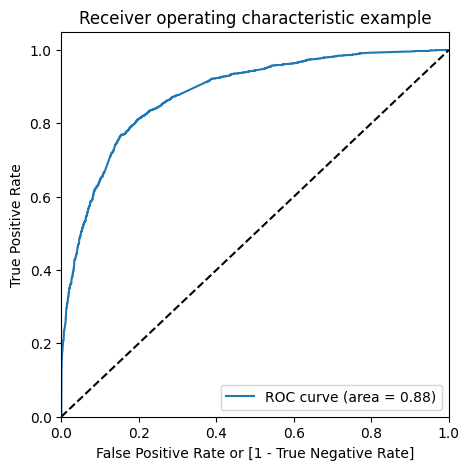

In [ ]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])
#draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff point

we had chosen an arbitrary cut-off value of 0.5. OPtimal cut-off probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3825,0,0.893991,3825,1,1,1,1,1,1,1,1,1,1,0
3307,1,0.790913,3307,1,1,1,1,1,1,1,1,1,0,0
5527,0,0.051038,5527,0,1,0,0,0,0,0,0,0,0,0
5180,1,0.485224,5180,0,1,1,1,1,1,0,0,0,0,0
7064,1,0.759921,7064,1,1,1,1,1,1,1,1,1,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382704  1.000000  0.000000
0.1   0.1  0.599299  0.971286  0.368679
0.2   0.2  0.725753  0.922597  0.603715
0.3   0.3  0.794713  0.836038  0.769092
0.4   0.4  0.813346  0.769455  0.840557
0.5   0.5  0.802676  0.656679  0.893189
0.6   0.6  0.793757  0.589680  0.920279
0.7   0.7  0.778946  0.508947  0.946336
0.8   0.8  0.750119  0.397836  0.968524
0.9   0.9  0.710941  0.262588  0.988906


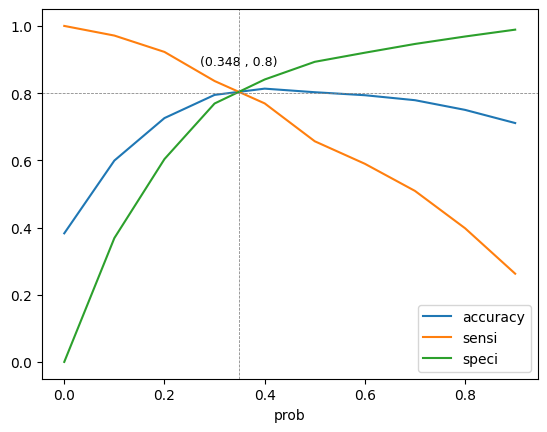

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()



Analysis of the above curve
Accuracy - Becomes stable after 0.35

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.35 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

So, 0.35 may be the optimal cutoff.

<span style="color:red">Note: From the curve above, ~0.35 (0.348) is the optimum point to take it as a cutoff probability

### Step 11: Make predictions on the test set

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
3825,0,0.893991,3825,1
3307,1,0.790913,3307,1
5527,0,0.051038,5527,0
5180,1,0.485224,5180,1
7064,1,0.759921,7064,1


Creating Lead Score

Creating a column called Lead Score by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100

In [ ]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead Score
3825,0,0.893991,3825,1,89.0
3307,1,0.790913,3307,1,79.0
5527,0,0.051038,5527,0,5.0
5180,1,0.485224,5180,1,49.0
7064,1,0.759921,7064,1,76.0


The customers with Lead Score more than 35 will be converted as we decided to have the optimal probablity cutoff is 0.35.<br>
Higher the Lead Score, higher the chance of the customers to be converted

Finding the average Lead Score of the predicted converted leads

In [ ]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['final_predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead Score
3825,0,0.893991,3825,1,89.0
3307,1,0.790913,3307,1,79.0
5180,1,0.485224,5180,1,49.0
7064,1,0.759921,7064,1,76.0
701,0,0.349605,701,1,35.0


In [ ]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

71

We can see that the average Lead Score of the customers, who were converted is 71

Finding the average Lead Score of the predicted not converted leads

In [ ]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['final_predicted']==0]
y_train_pred_not_converted.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead Score
5527,0,0.051038,5527,0,5.0
6246,0,0.157521,6246,0,16.0
6908,0,0.161719,6908,0,16.0
4078,0,0.273714,4078,0,27.0
4924,1,0.245845,4924,0,25.0


In [ ]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

14

We can see that the average Lead Score of the customers, who were not converted is 14.

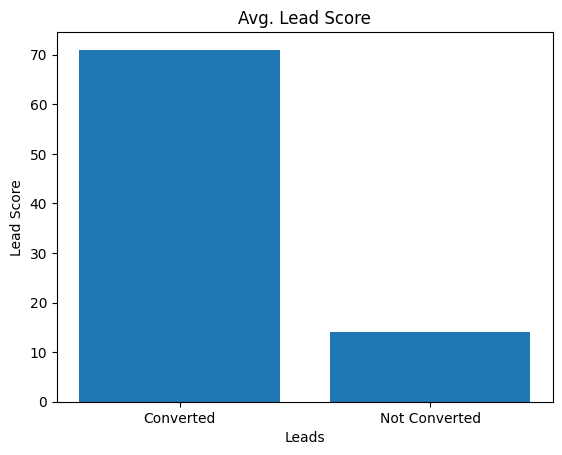

In [ ]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()